##Definition

Prompt Chaining is a technique in NLP where multiple prompts are sequenced together to guide a model through a complex task or reasoning process. 

Benefits-

Instead of a single task , it breaks the task to smaller , managable steps.

Can increase  the accuracy when working with LLMs.


In [18]:
from json import load
import os
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()
os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")

llm=ChatGoogleGenerativeAI(model="gemini-2.5-flash")
# result=llm.invoke("hey there!!")
# result

In [19]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display

class State(TypedDict):
    topic:str
    story:str
    improved_story:str
    final_story:str

In [20]:
def generate_story(state:State):
    msg=llm.invoke(f"Give a story premise on: {state["topic"]}")
    return {"story":msg.content}
def conflict(state:State):
    if "?" in state["story"] or "!" in state["story"]:
        return "fail"
    else:
        return "pass"
def improve_story(state:State):
    msg=llm.invoke(f"Imporve as you think fit : {state["story"]}")
    return {"improved_story":msg.content}
def polished_story(state:State):
    msg=llm.invoke(f"Give a twist to this story and finalize it: {state["improved_story"]}")
    return {"final_story":msg.content}

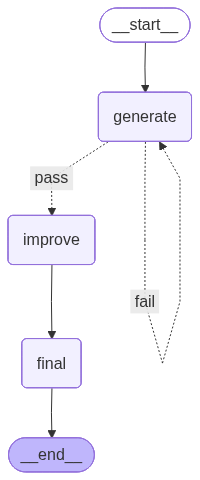

In [21]:
builder=StateGraph(State)
builder.add_node("generate",generate_story)
builder.add_node("improve",improve_story)
builder.add_node("final",polished_story)

builder.add_edge(START,"generate")
builder.add_conditional_edges("generate",conflict,{"pass":"improve","fail":"generate"})
builder.add_edge("improve","final")
builder.add_edge("final",END)
graph=builder.compile()


display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
result=graph.invoke({"topic":"Agentic AI Systems "})
result

In [30]:
with open("story.txt", 'w') as f:
    f.write(result["topic"]+"\n")
    f.write(result["story"]+"\n")
    f.write(result["improved_story"]+"\n")
    f.write(result["final_story"]+"\n")